In [8]:
import numpy as np

from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [9]:
file = np.loadtxt(open("data/safeway/report.csv", "rb"), delimiter=",")
# Sort data low-to-high based on risk factor
file_sorted = file[file[:,0].argsort()]
# Split the features from the labels
data = file_sorted[:,1:] # Features
labels = file_sorted[:,0] # Labels

# Assign data to bins. Used for coloring plots or classification
# Since data is sorted, we can uniformly assign colors
colors = np.empty(991, dtype='object')
colors[0:199] = "#30CF58"
colors[199:398] = "#61CF30"
colors[398:597] = "#DFDC20"
colors[597:796] = "#FF6800"
colors[796:] = "#FF0000"
# Markers
markers = np.empty(991, dtype='object')
markers[0:199] = "o"
markers[199:398] = "^"
markers[398:597] = "s"
markers[597:796] = "d"
markers[796:] = "*"

#print(data.shape)
#print(labels.shape)
#print(colors.shape)

In [3]:
pca = PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)

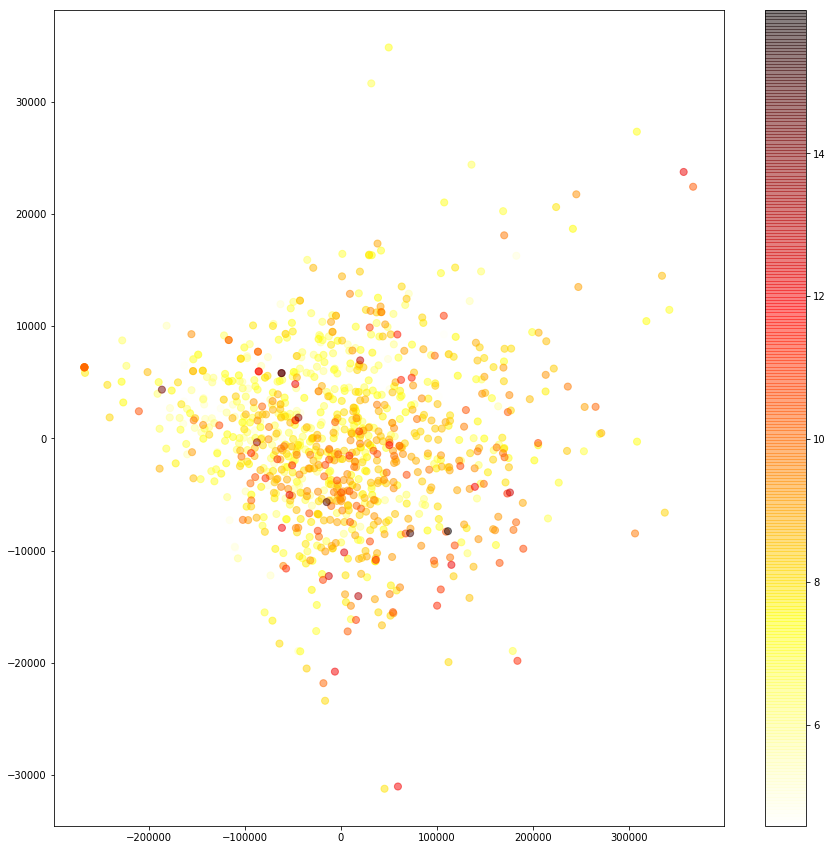

In [4]:
# Plot PCA points
from matplotlib.colors import to_rgba, ListedColormap

import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,15))
plt.scatter(data_pca[:,0], data_pca[:,1], c=labels, cmap=cm.hot_r, s=50*np.ones(991), alpha=0.5)
plt.colorbar()
plt.show()

In [5]:
from sklearn.manifold import TSNE

data_embedded = TSNE(n_components=3,perplexity=30,learning_rate=200,n_iter=1000).fit_transform(data)
print(data_embedded.shape)

(991, 3)


C:\Users\Richard\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


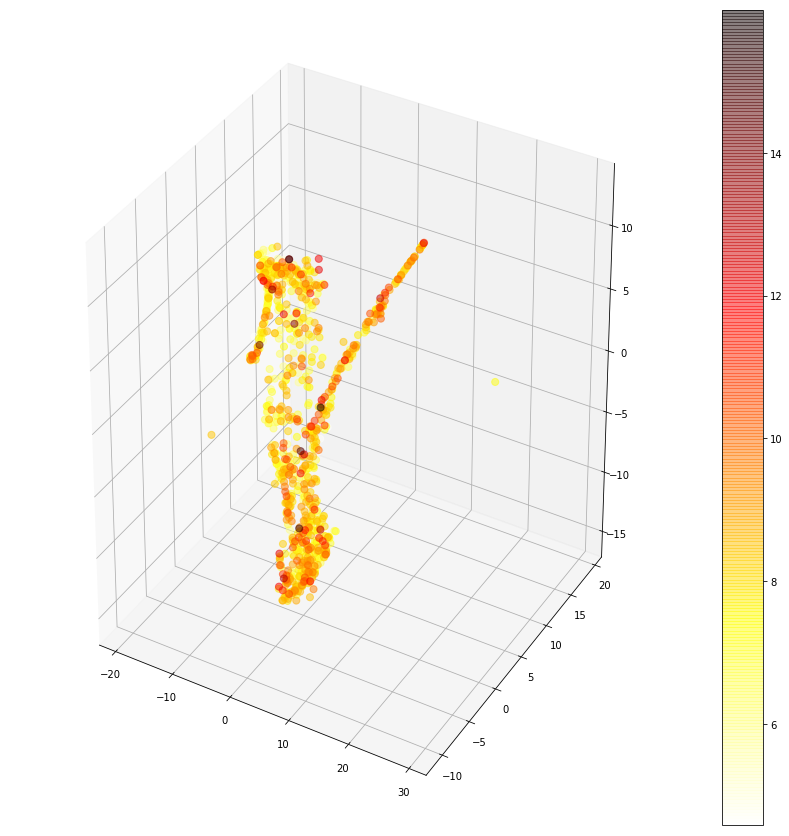

In [6]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
#for i in range(991):
    #plt.scatter(data_embedded[i,0],data_embedded[i,1],data_embedded[i,2] c=colors[i], edgecolor='black', linewidth='1')
    #ax.scatter(data_embedded[i,0],data_embedded[i,1],data_embedded[i,2], marker=markers[i], c=to_rgba(colors[i],0.5), edgecolor=colors[i], linewidth='1.5')
p = ax.scatter(data_embedded[:,0], data_embedded[:,1],data_embedded[:,2], c=labels, cmap=cm.hot_r, s=50*np.ones(991), alpha=0.5)
fig.colorbar(p)
fig.show()

In [7]:
from sklearn.metrics import silhouette_score

perplexity = [2, 5, 30, 50, 100]
learning_rate = [10, 100, 1000]
iters = [250, 500, 1000, 2000]
hp_dict_2d = {}
j = 0
for p in perplexity:
    for lr in learning_rate:
        for i in iters:
            print(j)
            j += 1
            data_embedded = TSNE(n_components=2,perplexity=p,learning_rate=lr,n_iter=i).fit_transform(data)
            score = silhouette_score(data_embedded,colors)
            hp = str(p)+"_"+str(lr)+"_"+str(i)
            hp_dict_2d[hp] = score
            plt.figure(figsize=(15,15))
            plt.scatter(data_embedded[:,0], data_embedded[:,1], c=labels, cmap=cm.hot_r, s=50*np.ones(991), alpha=0.5)
            plt.colorbar()
            plt.savefig("figures/"+hp+".png")
            plt.close()
np.save("hp_dict_2d.npy", hp_dict_2d)
print(hp_dict_2d)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
{'2_10_250': -0.04135764, '2_10_500': -0.054403633, '2_10_1000': -0.047316432, '2_10_2000': -0.036451254, '2_100_250': -0.057095107, '2_100_500': -0.034378693, '2_100_1000': -0.034057185, '2_100_2000': -0.027211986, '2_1000_250': -0.057761822, '2_1000_500': -0.04685792, '2_1000_1000': -0.041047476, '2_1000_2000': -0.04247795, '5_10_250': -0.058723528, '5_10_500': -0.038884439, '5_10_1000': -0.051052399, '5_10_2000': -0.061210632, '5_100_250': -0.070368275, '5_100_500': -0.05136174, '5_100_1000': -0.055175196, '5_100_2000': -0.061428599, '5_1000_250': -0.047826309, '5_1000_500': -0.036470752, '5_1000_1000': -0.046313606, '5_1000_2000': -0.048312321, '30_10_250': -0.098352149, '30_10_500': -0.066255264, '30_10_1000': -0.0720478, '30_10_2000': -0.084118366, '30_100_250': -0.10429563, '30_100_500': -0.072812699, '30_100_10

In [12]:
perplexity = [2, 5, 30, 50, 100]
learning_rate = [10, 100, 1000]
iters = [250, 500, 1000, 2000]
hp_dict = {}
j = 0
for p in perplexity:
    for lr in learning_rate:
        for i in iters:
            print(j)
            j += 1
            data_embedded = TSNE(n_components=3,perplexity=p,learning_rate=lr,n_iter=i).fit_transform(data)
            score = silhouette_score(data_embedded,colors)
            hp = str(p)+"_"+str(lr)+"_"+str(i)
            hp_dict[hp] = score
            fig = plt.figure(figsize=(15,15))
            ax = fig.gca(projection='3d')
            pl = ax.scatter(data_embedded[:,0], data_embedded[:,1],data_embedded[:,2], c=labels, cmap=cm.hot_r, s=50*np.ones(991), alpha=0.5)
            fig.colorbar(pl)
            fig.savefig("figures3/"+hp+".png")
            plt.close()
np.save("hp_dict_3d.npy", hp_dict)
print(hp_dict)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
{'2_10_250': -0.032962777, '2_10_500': -0.029447393, '2_10_1000': -0.035920903, '2_10_2000': -0.031896178, '2_100_250': -0.039490063, '2_100_500': -0.029046483, '2_100_1000': -0.040632065, '2_100_2000': -0.03952378, '2_1000_250': -0.037622165, '2_1000_500': -0.048155285, '2_1000_1000': -0.040941592, '2_1000_2000': -0.030459819, '5_10_250': -0.046406943, '5_10_500': -0.0389084, '5_10_1000': -0.037413783, '5_10_2000': -0.039102349, '5_100_250': -0.053586304, '5_100_500': -0.039989635, '5_100_1000': -0.041136518, '5_100_2000': -0.03696565, '5_1000_250': -0.045531079, '5_1000_500': -0.036591168, '5_1000_1000': -0.04431726, '5_1000_2000': -0.25423148, '30_10_250': -0.098765694, '30_10_500': -0.057550363, '30_10_1000': -0.057086561, '30_10_2000': -0.052282088, '30_100_250': -0.094217524, '30_100_500': -0.052316479, '30_100_1

In [15]:
print(max(hp_dict_2d, key=hp_dict_2d.get))
print(hp_dict_2d['2_100_2000'])

2_100_2000
-0.027212


In [10]:
from sklearn.linear_model import (LinearRegression, Ridge, 
                                  Lasso, RandomizedLasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from minepy import MINE
 
np.random.seed(0)
 
X = data
Y = labels
names = ["x%s" % i for i in range(1,29)]
 
ranks = {}
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))
 
lr = LinearRegression(normalize=True)
lr.fit(X, Y)
ranks["L Reg"] = rank_to_dict(np.abs(lr.coef_), names)
 
ridge = Ridge(alpha=7)
ridge.fit(X, Y)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)
 
 
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)
 
 
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["Stab"] = rank_to_dict(np.abs(rlasso.scores_), names)
 
#stop the search when 5 features are left (they will get equal scores)
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X,Y)
ranks["RFE"] = rank_to_dict(list(map(float, rfe.ranking_)), names, order=-1)
 
rf = RandomForestRegressor()
rf.fit(X,Y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)
 
 
f, pval  = f_regression(X, Y, center=True)
ranks["Corr."] = rank_to_dict(f, names)
 
mine = MINE()
mic_scores = []
for i in range(X.shape[1]):
    mine.compute_score(X[:,i], Y)
    m = mine.mic()
    mic_scores.append(m)
 
ranks["MIC"] = rank_to_dict(mic_scores, names) 
 
 
r = {}
for name in names:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print ("\t%s" % "\t".join(methods))
for name in names:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

C:\Users\Richard\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


	Corr.	L Reg	Lasso	MIC	RF	RFE	Ridge	Stab	Mean
x1	0.21	0.0	0.0	0.58	0.09	0.0	0.0	0.0	0.11
x2	0.33	0.0	0.0	0.74	0.07	0.13	0.0	0.0	0.16
x3	0.22	0.0	0.0	0.59	0.03	0.09	0.0	0.0	0.12
x4	0.38	0.0	0.12	0.47	0.34	0.87	0.02	0.0	0.28
x5	0.6	0.0	0.0	0.77	0.25	0.39	0.0	0.0	0.25
x6	0.0	0.16	0.0	0.87	0.16	1.0	0.24	0.0	0.3
x7	1.0	0.0	0.0	1.0	1.0	0.3	0.0	0.0	0.41
x8	0.93	0.0	0.01	0.87	0.4	0.52	0.0	0.0	0.34
x9	0.07	0.01	0.0	0.78	0.08	1.0	0.02	0.0	0.25
x10	0.24	1.0	0.0	0.56	0.07	1.0	1.0	0.0	0.48
x11	0.18	0.0	0.01	0.38	0.29	0.48	0.0	0.0	0.17
x12	0.2	0.0	0.01	0.44	0.5	0.7	0.0	0.0	0.23
x13	0.06	0.0	0.0	0.29	0.06	0.22	0.0	0.0	0.08
x14	0.04	0.0	0.03	0.08	0.04	0.74	0.0	0.0	0.12
x15	0.0	0.0	0.0	0.16	0.08	0.35	0.0	0.0	0.07
x16	0.0	0.26	0.0	0.28	0.07	0.91	0.78	0.0	0.29
x17	0.0	0.0	0.06	0.09	0.01	0.83	0.01	0.0	0.12
x18	0.02	0.0	0.0	0.2	0.28	0.43	0.0	0.0	0.12
x19	0.0	0.0	0.0	0.14	0.08	0.17	0.0	0.0	0.05
x20	0.02	0.0	0.01	0.45	0.05	0.57	0.0	0.0	0.14
x21	0.0	0.0	0.01	0.08	0.05	0.65	0.0	0.0	0.1
x22	0.0	0.0	0.0	0.09	0.0